<h2 align="center"><u>AtliQ Hotels Data Analysis Project</u><h2>

In [955]:
import pandas as pd

***
### ==> 1. Data Import and Data Exploration
***

<b>Datasets</b>

we have 5 csv files:
- fact_bookings
- fact_aggregated_bookings
- dim_date
- dim_hotels
- dim_rooms


<b> 1. Read bookings data in dataframe </b>

In [956]:
df_bookings= pd.read_csv("datasets/fact_bookings.csv")

<b> 1. Explore bookings data </b>

In [957]:
df_bookings.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640


In [958]:
df_bookings.shape

(134590, 12)

In [959]:
df_bookings.nunique()

booking_id           134590
property_id              25
booking_date            116
check_in_date            92
checkout_date            97
no_guests                14
room_category             4
booking_platform          7
ratings_given             5
booking_status            3
revenue_generated        67
revenue_realized        124
dtype: int64

In [960]:
df_bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [961]:
df_bookings.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

<AxesSubplot:>

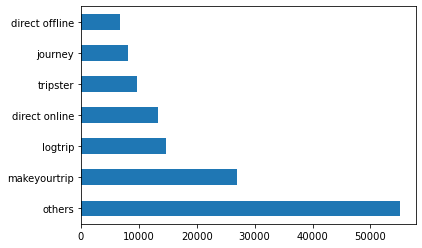

In [962]:
df_bookings.booking_platform.value_counts().plot(kind= 'barh')

In [963]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [964]:
df_bookings.revenue_generated.min(), df_bookings.revenue_generated.max()

(6500, 28560000)

<b> Read rest of the csv files </b>

In [965]:
df_date= pd.read_csv("datasets/dim_date.csv")
df_hotels= pd.read_csv("datasets/dim_hotels.csv")
df_rooms= pd.read_csv("datasets/dim_rooms.csv")
df_agg_bookings= pd.read_csv("datasets/fact_aggregated_bookings.csv")

<b> 2. Read hotels data in dataframe </b>

In [966]:
df_hotels= pd.read_csv("datasets/dim_hotels.csv")

<b> 2. Explore hotels data </b>

In [967]:
df_hotels.head(4)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi


In [968]:
df_hotels.shape

(25, 4)

In [969]:
df_hotels.nunique()

property_id      25
property_name     7
category          2
city              4
dtype: int64

In [970]:
df_hotels.category.unique()

array(['Luxury', 'Business'], dtype=object)

In [971]:
df_hotels.category.value_counts()

Luxury      16
Business     9
Name: category, dtype: int64

<AxesSubplot:>

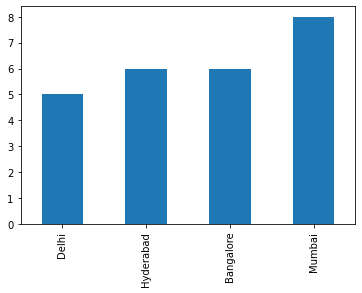

In [972]:
df_hotels.city.value_counts().sort_values().plot(kind="bar")

<b> 3. Read aggregated bookings data in dataframe </b>

In [973]:
df_agg_bookings= pd.read_csv("datasets/fact_aggregated_bookings.csv")

<b> 3. Explore aggregated bookings data </b>

In [974]:
df_agg_bookings.head(15)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0
5,17560,1-May-22,RT1,28,40.0
6,19558,1-May-22,RT1,25,40.0
7,19560,1-May-22,RT1,23,26.0
8,17561,1-May-22,RT1,22,NaN
9,16560,1-May-22,RT1,24,34.0


In [975]:
df_agg_bookings.shape

(9200, 5)

In [976]:
df_agg_bookings.nunique()

property_id            25
check_in_date          92
room_category           4
successful_bookings    45
capacity               38
dtype: int64

In [977]:
type_check=df_agg_bookings['successful_bookings'].dtype
print(type_check)

int64


**Exercise-1. Find out unique property ids in aggregate bookings dataset**

In [978]:
df_agg_bookings.property_id.unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560], dtype=int64)

**Exercise-2. Find out total bookings per property_id**

In [979]:
Total_bookings_per_property = df_agg_bookings.groupby('property_id').successful_bookings.sum().reset_index(name='total_bookings')
Total_bookings_per_property 

,property_id,total_bookings
0,16558,3153
1,16559,7338
2,16560,4693
3,16561,4418
4,16562,4820
5,16563,7211
6,17558,5053
7,17559,6142
8,17560,6013
9,17561,5183


**Exercise-3. Find out days on which bookings are greater than capacity**

In [980]:
df_agg_bookings.check_in_date.dtype

dtype('O')

In [981]:
df_agg_bookings['check_in_date']= pd.to_datetime(df_agg_bookings['check_in_date'])
df_agg_bookings['check_in_date']

0      2022-05-01
1      2022-05-01
2      2022-05-01
3      2022-05-01
4      2022-05-01
          ...    
9195   2022-07-31
9196   2022-07-31
9197   2022-07-31
9198   2022-07-31
9199   2022-07-31
Name: check_in_date, Length: 9200, dtype: datetime64[ns]

In [982]:
df_agg_bookings[df_agg_bookings.successful_bookings>df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,2022-05-01,RT1,30,19.0
12,16563,2022-05-01,RT1,100,41.0
4136,19558,2022-06-11,RT2,50,39.0
6209,19560,2022-07-02,RT1,123,26.0
8522,19559,2022-07-25,RT1,35,24.0
9194,18563,2022-07-31,RT4,20,18.0


In [983]:
df_agg_bookings[df_agg_bookings.successful_bookings>df_agg_bookings.capacity].check_in_date

3      2022-05-01
12     2022-05-01
4136   2022-06-11
6209   2022-07-02
8522   2022-07-25
9194   2022-07-31
Name: check_in_date, dtype: datetime64[ns]

**Exercise-4. Find out properties that have highest capacity**

In [984]:
df_agg_bookings['capacity'].max()

50.0

***
### ==> 2. Data Cleaning
***

In [985]:
df_old_bookings= pd.read_csv("datasets/fact_bookings.csv")
df_old_bookings.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640


In [986]:
df_old_bookings.revenue_generated.min(), df_old_bookings.revenue_generated.max() #bM what is max revenue rent

(6500, 28560000)

**1. Outlier Removal in revenue_generated using mean and 3 std deviation**

In [987]:
#detecting outlier through mean and 3 std deviation (if the value is greater than 3 std deviation, then considered as an outlier)

df_old_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [988]:
avg, std= df_old_bookings.revenue_generated.mean(), df_old_bookings.revenue_generated.std()

In [989]:
avg, std

(15378.05412734973, 93036.03867097024)

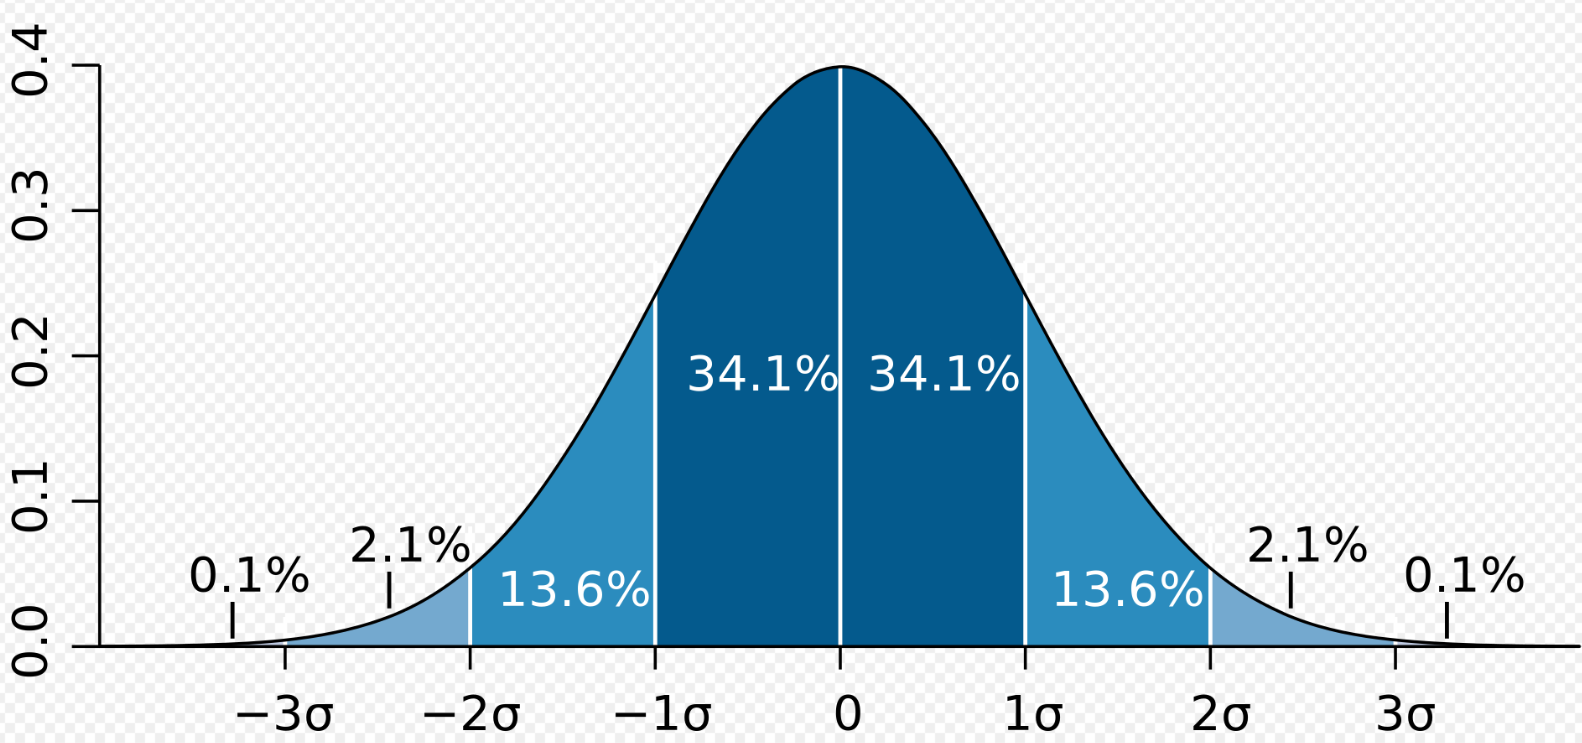

In [990]:
higher_limit= avg+ 3*std #if value is more than this, considered as an outlier
higher_limit

294486.1701402605

In [991]:
lower_limit= avg- 3*std
lower_limit

-263730.061885561

In [992]:
df_old_bookings[df_old_bookings.revenue_generated<0] #checking if revenue is less than 0 or not

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [993]:
df_old_bookings[df_old_bookings.revenue_generated>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [994]:
df_new_bookings= df_old_bookings[df_old_bookings.revenue_generated<higher_limit]
df_new_bookings

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [995]:
df_new_bookings.shape

(134585, 12)

**2. Removing -ve Guests values or Invalid Guests**

In [996]:
df_new_bookings[df_new_bookings.no_guests<0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


In [997]:
df_new_bookings= df_new_bookings[df_new_bookings.no_guests>0]

In [998]:
df_new_bookings #creating a dataframe rather than asking DE or dropping -ve values permanently.
            #hence, cleaned the data

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [999]:
df_new_bookings.shape

(134573, 12)

**3. Outlier check in revenue_realization**

In [1000]:
df_new_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134573.000000,134573.000000,56676.000000,134573.000000,134573.000000
mean,18061.191658,2.036716,3.619045,14915.959776,12695.983585
std,1093.042273,1.031673,1.234983,6452.676164,6927.791692
min,16558.000000,1.000000,1.000000,6500.000000,2600.000000
25%,17558.000000,1.000000,3.000000,9900.000000,7600.000000
50%,17564.000000,2.000000,4.000000,13500.000000,11700.000000
75%,18563.000000,2.000000,5.000000,18000.000000,15300.000000
max,19563.000000,6.000000,5.000000,45220.000000,45220.000000


In [1001]:
#performing std deviation check on revenue_realized too
avg1, std1= df_new_bookings.revenue_realized.mean(), df_new_bookings.revenue_realized.std()
avg1, std1

(12695.983585117372, 6927.791692242509)

In [1002]:
higher_limit1=avg1 + 3*std1
higher_limit1

33479.3586618449

In [1003]:
lower_limit1=avg1 - 3*std1
lower_limit1

-8087.391491610155

In [1004]:
df_new_bookings[df_new_bookings.revenue_realized<lower_limit1]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [1005]:
df_new_bookings[df_new_bookings.revenue_realized>higher_limit1]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-22,1/5/2022,7/5/2022,4.0,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,1/5/2022,1/5/2022,2/5/2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,28-04-22,1/5/2022,3/5/2022,3.0,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,24-04-22,1/5/2022,7/5/2022,5.0,RT4,logtrip,NaN,Checked Out,41990,41990
222,May012216560RT45,16560,30-04-22,1/5/2022,3/5/2022,5.0,RT4,others,3.0,Checked Out,34580,34580
...,...,...,...,...,...,...,...,...,...,...,...,...
134328,Jul312219560RT49,19560,31-07-22,31-07-22,2/8/2022,6.0,RT4,direct online,5.0,Checked Out,39900,39900
134331,Jul312219560RT412,19560,31-07-22,31-07-22,1/8/2022,6.0,RT4,others,2.0,Checked Out,39900,39900
134467,Jul312219562RT45,19562,28-07-22,31-07-22,1/8/2022,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134474,Jul312219562RT412,19562,25-07-22,31-07-22,6/8/2022,5.0,RT4,direct offline,5.0,Checked Out,37050,37050


**Further Digging for room RT4**

One observation we can have in above dataframe is that all rooms are RT4 which means presidential suit. Now since RT4 is a luxurious room it is likely their rent will be higher. To make a fair analysis, we need to do data analysis only on RT4 room types

In [1006]:
df_rooms #talk to BM for revenue realization for presidential rooms RT4

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [1007]:
#doing it on specific room category RT4 and performing std deviation check 
df_new_bookings[df_new_bookings.room_category=="RT4"].revenue_realized.describe()

count    16071.000000
mean     23439.308444
std       9048.599076
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

In [1008]:
avg2, std2= df_new_bookings[df_new_bookings.room_category=="RT4"].revenue_realized.mean(), df_new_bookings[df_new_bookings.room_category=="RT4"].revenue_realized.std()
avg2, std2

(23439.308443780723, 9048.599075739625)

In [1009]:
higher_limit2=avg2 + 3*std2
higher_limit2

50585.1056709996

Here higher limit comes to be 50583 and in our dataframe above we can see that max value for revenue realized is 45220. Hence we can conclude that there is no outlier and we don't need to do any data cleaning on this particular column

You can see the proof below (if not satisfied with above answer xD)

In [1010]:
lower_limit2=avg2 - 3*std2
lower_limit2

-3706.4887834381516

In [1011]:
df_new_bookings[df_new_bookings.revenue_realized<lower_limit2]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [1012]:
df_new_bookings[df_new_bookings.revenue_realized>higher_limit2]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


**4. Handling Null Values**

In [1013]:
df_new_bookings.isnull()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,True,False,False,False
7,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,False,False,False,False,False,False,False,False,False,False,False,False
134585,False,False,False,False,False,False,False,False,False,False,False,False
134587,False,False,False,False,False,False,False,False,True,False,False,False
134588,False,False,False,False,False,False,False,False,False,False,False,False


In [1014]:
df_new_bookings.isnull().sum() #it is okay to have null values in ratings column

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

Total values in our dataframe is 134573. Out of that 77897 rows has null rating. Since there are many rows with null rating, we should not filter these values. Also we should not replace this rating with a median or mean rating, etc.

**Exercise-1. In aggregate bookings find columns that have null values. Fill these null values with whatever you think is the appropriate subtitute (possible ways is to use mean or median)**

In [1015]:
df_agg_bookings.head(6)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,2022-05-01,RT1,25,30.0
1,19562,2022-05-01,RT1,28,30.0
2,19563,2022-05-01,RT1,23,30.0
3,17558,2022-05-01,RT1,30,19.0
4,16558,2022-05-01,RT1,18,19.0
5,17560,2022-05-01,RT1,28,40.0


In [1016]:
df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [1017]:
df_agg_bookings[df_agg_bookings.capacity.isnull()]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,2022-05-01,RT1,22,NaN
14,17562,2022-05-01,RT1,12,NaN


In [1018]:
df_agg_bookings.describe()

,property_id,successful_bookings,capacity
count,9200.000000,9200.000000,9198.000000
mean,18040.640000,14.655761,25.280496
std,1099.818325,7.736170,11.442080
min,16558.000000,1.000000,3.000000
25%,17558.000000,9.000000,18.000000
50%,17564.000000,14.000000,25.000000
75%,18563.000000,19.000000,34.000000
max,19563.000000,123.000000,50.000000


In [1019]:
df_agg_bookings.capacity.mean()

25.280495759947815

In [1020]:
df_agg_bookings['capacity'].fillna(df_agg_bookings['capacity'].mean(), inplace=True)

In [1021]:
df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               0
dtype: int64

In [1022]:
df_agg_bookings['capacity'].iloc[8], df_agg_bookings['capacity'].iloc[14]

(25.280495759947815, 25.280495759947815)

**Exercise-2. In aggregate bookings find out records that have successful_bookings value greater than capacity. Filter those records**

In [1023]:
df_agg_bookings.head(6)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,2022-05-01,RT1,25,30.0
1,19562,2022-05-01,RT1,28,30.0
2,19563,2022-05-01,RT1,23,30.0
3,17558,2022-05-01,RT1,30,19.0
4,16558,2022-05-01,RT1,18,19.0
5,17560,2022-05-01,RT1,28,40.0


In [1024]:
df_agg_bookings[df_agg_bookings.successful_bookings> df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,2022-05-01,RT1,30,19.0
12,16563,2022-05-01,RT1,100,41.0
4136,19558,2022-06-11,RT2,50,39.0
6209,19560,2022-07-02,RT1,123,26.0
8522,19559,2022-07-25,RT1,35,24.0
9194,18563,2022-07-31,RT4,20,18.0


In [1025]:
df_agg_bookings.shape

(9200, 5)

In [1026]:
df_a_b= df_agg_bookings[df_agg_bookings.successful_bookings<=df_agg_bookings.capacity]
df_a_b.shape

(9194, 5)

***
### ==> 3. Data Transformation
***

There are various types of data transformations that you may have to perform based on the need. Few examples of data transformations are:
1. Creating new columns
2. Normalization
3. Merging Data
4. Aggregation (are the ones which are discussed in describe method)

Here, we will be creating new column called occupancy %

In [1027]:
df_agg_bookings.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,2022-05-01,RT1,25,30.0
1,19562,2022-05-01,RT1,28,30.0
2,19563,2022-05-01,RT1,23,30.0
3,17558,2022-05-01,RT1,30,19.0


In [1028]:
df_agg_bookings['occ_pct']= df_agg_bookings['successful_bookings']/ df_agg_bookings['capacity']
df_agg_bookings['occ_pct'].head(3)

0    0.833333
1    0.933333
2    0.766667
Name: occ_pct, dtype: float64

In [1029]:
df_agg_bookings.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,2022-05-01,RT1,25,30.0,0.833333
1,19562,2022-05-01,RT1,28,30.0,0.933333
2,19563,2022-05-01,RT1,23,30.0,0.766667
3,17558,2022-05-01,RT1,30,19.0,1.578947


In [1030]:
df_agg_bookings['occ_pct']= (df_agg_bookings['occ_pct']*100).round(2)

In [1031]:
df_agg_bookings.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,2022-05-01,RT1,25,30.0,83.33
1,19562,2022-05-01,RT1,28,30.0,93.33
2,19563,2022-05-01,RT1,23,30.0,76.67
3,17558,2022-05-01,RT1,30,19.0,157.89


<b>You can also create column like:</b>

df_agg_bookings['occ_pct_']= df_agg_bookings.apply(lambda x: x['successful_bookings']/x['capacity'], axis=1)

<b>Convert into the percent value:</b>

df_agg_bookings['occ_pct_']= df_agg_bookings['occ_pct_'].apply(lambda x: round(x*100, 2))

***
### ==> 4. Insights Generation
***

#whenever working in x company, a BM can come to your desk, and will ask certain questions to DA. such questions are called as ad-hoc questions.

**1. What is an average occupancy rate in each of the room categories?**


In [1032]:
df_agg_bookings.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,2022-05-01,RT1,25,30.0,83.33
1,19562,2022-05-01,RT1,28,30.0,93.33
2,19563,2022-05-01,RT1,23,30.0,76.67
3,17558,2022-05-01,RT1,30,19.0,157.89


In [1033]:
df_agg_bookings.drop(columns=['occ_pct_'], inplace= True)

KeyError: "['occ_pct_'] not found in axis"

In [1034]:
df_agg_bookings.head(20)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,2022-05-01,RT1,25,30.000000,83.33
1,19562,2022-05-01,RT1,28,30.000000,93.33
2,19563,2022-05-01,RT1,23,30.000000,76.67
3,17558,2022-05-01,RT1,30,19.000000,157.89
4,16558,2022-05-01,RT1,18,19.000000,94.74
5,17560,2022-05-01,RT1,28,40.000000,70.00
6,19558,2022-05-01,RT1,25,40.000000,62.50
7,19560,2022-05-01,RT1,23,26.000000,88.46
8,17561,2022-05-01,RT1,22,25.280496,87.02
9,16560,2022-05-01,RT1,24,34.000000,70.59


In [1035]:
df_agg_bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [1036]:
df_agg_bookings.groupby('room_category').occ_pct.mean().round(2)

room_category
RT1    58.23
RT2    58.04
RT3    58.03
RT4    59.30
Name: occ_pct, dtype: float64

I don't understand RT1, RT2 etc. Print room categories such as Standard, Premium, Elite etc along with average occupancy percentage

In [1037]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [1038]:
df= pd.merge(df_agg_bookings, df_rooms, left_on= 'room_category', right_on= 'room_id')
df

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class
0,16559,2022-05-01,RT1,25,30.0,83.33,RT1,Standard
1,19562,2022-05-01,RT1,28,30.0,93.33,RT1,Standard
2,19563,2022-05-01,RT1,23,30.0,76.67,RT1,Standard
3,17558,2022-05-01,RT1,30,19.0,157.89,RT1,Standard
4,16558,2022-05-01,RT1,18,19.0,94.74,RT1,Standard
...,...,...,...,...,...,...,...,...
9195,16563,2022-07-31,RT4,13,18.0,72.22,RT4,Presidential
9196,16559,2022-07-31,RT4,13,18.0,72.22,RT4,Presidential
9197,17558,2022-07-31,RT4,3,6.0,50.00,RT4,Presidential
9198,19563,2022-07-31,RT4,3,6.0,50.00,RT4,Presidential


In [1071]:
df.groupby('room_class').occ_pct.mean().round(2)

room_class
Elite           58.04
Premium         58.03
Presidential    59.30
Standard        58.23
Name: occ_pct, dtype: float64

<AxesSubplot:ylabel='room_class'>

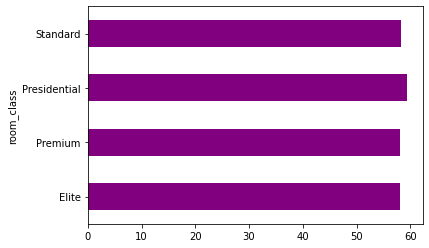

In [1070]:
df.groupby('room_class').occ_pct.mean().round(2).plot(kind= 'barh', color='purple')

In [1040]:
df.drop('room_id',axis=1, inplace= True)

In [1041]:
df.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16559,2022-05-01,RT1,25,30.0,83.33,Standard
1,19562,2022-05-01,RT1,28,30.0,93.33,Standard
2,19563,2022-05-01,RT1,23,30.0,76.67,Standard
3,17558,2022-05-01,RT1,30,19.0,157.89,Standard


In [1042]:
df[df.room_class=='Standard'].occ_pct.mean()

58.232091304347875

**2. Print average occupancy rate per city**

In [1043]:
df_hotels.head(4)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi


In [1044]:
df_final= pd.merge(df, df_hotels, on="property_id")
df_final.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city
0,16559,2022-05-01,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai
1,16559,2022-05-02,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai
2,16559,2022-05-03,RT1,17,30.0,56.67,Standard,Atliq Exotica,Luxury,Mumbai
3,16559,2022-05-04,RT1,21,30.0,70.00,Standard,Atliq Exotica,Luxury,Mumbai


In [1045]:
df_hotels.city.unique()

array(['Delhi', 'Mumbai', 'Hyderabad', 'Bangalore'], dtype=object)

In [1072]:
df_final.groupby("city").occ_pct.mean()

city
Bangalore    56.594207
Delhi        61.606467
Hyderabad    58.144651
Mumbai       57.942629
Name: occ_pct, dtype: float64

<AxesSubplot:ylabel='city'>

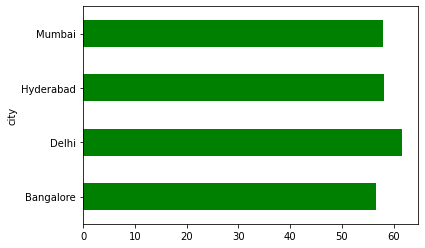

In [1068]:
df_final.groupby("city").occ_pct.mean().plot(kind='barh',color='green')

**3. When was the occupancy better? Weekday or Weekend?**

In [1047]:
df_date.head(4)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday


In [1048]:
df.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16559,2022-05-01,RT1,25,30.0,83.33,Standard
1,19562,2022-05-01,RT1,28,30.0,93.33,Standard
2,19563,2022-05-01,RT1,23,30.0,76.67,Standard
3,17558,2022-05-01,RT1,30,19.0,157.89,Standard


In [1049]:
df_date.date.dtype

dtype('O')

In [1052]:
df_date['date']= pd.to_datetime(df_date['date'])

In [1053]:
df_date.head(3)

,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday


In [1056]:
df_date.date.dtype

dtype('<M8[ns]')

In [1054]:
df.check_in_date.dtype

dtype('<M8[ns]')

Now

In [1057]:
df_date.head(4)

,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday
3,2022-05-04,May 22,W 19,weekeday


In [1058]:
df.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16559,2022-05-01,RT1,25,30.0,83.33,Standard
1,19562,2022-05-01,RT1,28,30.0,93.33,Standard
2,19563,2022-05-01,RT1,23,30.0,76.67,Standard
3,17558,2022-05-01,RT1,30,19.0,157.89,Standard


In [1061]:
df_final_2= pd.merge(df_date, df, left_on='date', right_on='check_in_date')  #common columns but diff names
df_final_2.head(3)

,date,mmm yy,week no,day_type,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,2022-05-01,May 22,W 19,weekend,16559,2022-05-01,RT1,25,30.0,83.33,Standard
1,2022-05-01,May 22,W 19,weekend,19562,2022-05-01,RT1,28,30.0,93.33,Standard
2,2022-05-01,May 22,W 19,weekend,19563,2022-05-01,RT1,23,30.0,76.67,Standard


In [1073]:
df_final_2.groupby('day_type').occ_pct.mean().round(2)

day_type
weekeday    51.82
weekend     74.24
Name: occ_pct, dtype: float64

<AxesSubplot:ylabel='day_type'>

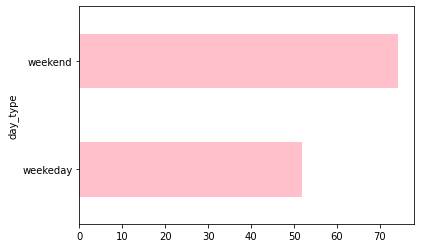

In [1069]:
df_final_2.groupby('day_type').occ_pct.mean().round(2).plot(kind='barh', color='pink')

**4: In the month of June, what is the occupancy for different cities**

In [1126]:
df_final= pd.merge(df, df_hotels, on="property_id")
df_final

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city
0,16559,2022-05-01,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai
1,16559,2022-05-02,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai
2,16559,2022-05-03,RT1,17,30.0,56.67,Standard,Atliq Exotica,Luxury,Mumbai
3,16559,2022-05-04,RT1,21,30.0,70.00,Standard,Atliq Exotica,Luxury,Mumbai
4,16559,2022-05-05,RT1,16,30.0,53.33,Standard,Atliq Exotica,Luxury,Mumbai
...,...,...,...,...,...,...,...,...,...,...
9195,18560,2022-07-27,RT4,6,15.0,40.00,Presidential,Atliq City,Business,Hyderabad
9196,18560,2022-07-28,RT4,9,15.0,60.00,Presidential,Atliq City,Business,Hyderabad
9197,18560,2022-07-29,RT4,8,15.0,53.33,Presidential,Atliq City,Business,Hyderabad
9198,18560,2022-07-30,RT4,9,15.0,60.00,Presidential,Atliq City,Business,Hyderabad


In [1128]:
df_june = df_final[df_final['check_in_date'].dt.month == 6]
df_june

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city
31,16559,2022-06-01,RT1,14,30.0,46.67,Standard,Atliq Exotica,Luxury,Mumbai
32,16559,2022-06-02,RT1,17,30.0,56.67,Standard,Atliq Exotica,Luxury,Mumbai
33,16559,2022-06-03,RT1,16,30.0,53.33,Standard,Atliq Exotica,Luxury,Mumbai
34,16559,2022-06-04,RT1,24,30.0,80.00,Standard,Atliq Exotica,Luxury,Mumbai
35,16559,2022-06-05,RT1,29,30.0,96.67,Standard,Atliq Exotica,Luxury,Mumbai
...,...,...,...,...,...,...,...,...,...,...
9164,18560,2022-06-26,RT4,13,15.0,86.67,Presidential,Atliq City,Business,Hyderabad
9165,18560,2022-06-27,RT4,10,15.0,66.67,Presidential,Atliq City,Business,Hyderabad
9166,18560,2022-06-28,RT4,10,15.0,66.67,Presidential,Atliq City,Business,Hyderabad
9167,18560,2022-06-29,RT4,9,15.0,60.00,Presidential,Atliq City,Business,Hyderabad


In [1136]:
import numpy as np
occ_by_city= df_june.groupby('city').occ_pct.mean().round(2)
occ_by_city

city
Bangalore    55.95
Delhi        61.46
Hyderabad    57.69
Mumbai       57.79
Name: occ_pct, dtype: float64

In [1138]:
occupancy_by_city_rounded = np.ceil(occ_by_city)
occupancy_by_city_rounded

city
Bangalore    56.0
Delhi        62.0
Hyderabad    58.0
Mumbai       58.0
Name: occ_pct, dtype: float64

<AxesSubplot:xlabel='city'>

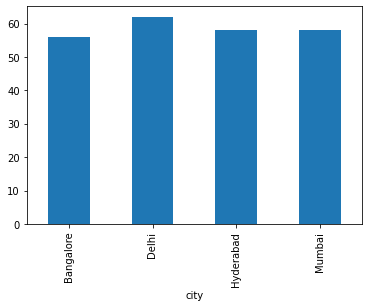

In [1139]:
occupancy_by_city_rounded.plot(kind='bar')

**5: We got new data for the month of august. Append that to existing data**

In [1142]:
df_aug= pd.read_csv('datasets/new_data_august.csv')
df_aug.head(4)

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67
3,19558,Atliq Grands,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,40,75.00


In [1154]:
df_aug['check_in_date']= pd.to_datetime(df_aug['check_in_date'])
df_aug['check_in_date'].head(2)

0   2022-08-01
1   2022-08-01
Name: check_in_date, dtype: datetime64[ns]

In [1155]:
df_final.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city
0,16559,2022-05-01,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai
1,16559,2022-05-02,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai
2,16559,2022-05-03,RT1,17,30.0,56.67,Standard,Atliq Exotica,Luxury,Mumbai
3,16559,2022-05-04,RT1,21,30.0,70.00,Standard,Atliq Exotica,Luxury,Mumbai


In [1163]:
df_aug_final= pd.concat([df_final, df_aug], axis=0)
df_aug_final.tail(400)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,mmm yy,week no,day_type,occ%
8807,17564,2022-07-07,RT4,8,17.0,47.06,Presidential,Atliq Seasons,Business,Mumbai,NaN,NaN,NaN,NaN
8808,17564,2022-07-08,RT4,7,17.0,41.18,Presidential,Atliq Seasons,Business,Mumbai,NaN,NaN,NaN,NaN
8809,17564,2022-07-09,RT4,11,17.0,64.71,Presidential,Atliq Seasons,Business,Mumbai,NaN,NaN,NaN,NaN
8810,17564,2022-07-10,RT4,10,17.0,58.82,Presidential,Atliq Seasons,Business,Mumbai,NaN,NaN,NaN,NaN
8811,17564,2022-07-11,RT4,8,17.0,47.06,Presidential,Atliq Seasons,Business,Mumbai,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,19563,2022-08-01,RT1,23,30.0,NaN,Standard,Atliq Palace,Business,Bangalore,Aug-22,W 32,weekeday,76.67
3,19558,2022-08-01,RT1,30,40.0,NaN,Standard,Atliq Grands,Luxury,Bangalore,Aug-22,W 32,weekeday,75.00
4,19560,2022-08-01,RT1,20,26.0,NaN,Standard,Atliq City,Business,Bangalore,Aug-22,W 32,weekeday,76.92
5,17561,2022-08-01,RT1,18,26.0,NaN,Standard,Atliq Blu,Luxury,Mumbai,Aug-22,W 32,weekeday,69.23


In [1157]:
df_aug_final.shape

(9207, 14)

**6. Print revenue realized per city**

In [1170]:
df_new_bookings.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640


In [1166]:
df_hotels.head(4)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi


In [1176]:
df_bookings_hotels= pd.merge(df_new_bookings, df_hotels, on='property_id')
df_bookings_hotels.head(65)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,May022216558RT25,16558,25-04-22,2/5/2022,3/5/2022,2.0,RT2,makeyourtrip,NaN,Cancelled,12600,5040,Atliq Grands,Luxury,Delhi
61,May022216558RT26,16558,1/5/2022,2/5/2022,7/5/2022,2.0,RT2,tripster,NaN,Checked Out,12600,12600,Atliq Grands,Luxury,Delhi
62,May022216558RT27,16558,29-04-22,2/5/2022,8/5/2022,2.0,RT2,others,NaN,Checked Out,12600,12600,Atliq Grands,Luxury,Delhi
63,May022216558RT28,16558,2/5/2022,2/5/2022,3/5/2022,2.0,RT2,journey,2.0,Checked Out,12600,12600,Atliq Grands,Luxury,Delhi


In [1174]:
df_bookings_hotels.groupby('city').revenue_realized.sum()

city
Bangalore    420383550
Delhi        294404488
Hyderabad    325179310
Mumbai       668569251
Name: revenue_realized, dtype: int64

**7. Print month by month revenue**

In [1214]:
df_date.head(4)

,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday
3,2022-05-04,May 22,W 19,weekeday


In [1215]:
df_date['date'] = pd.to_datetime(df_date['date'])


In [1216]:
df_date.date.dtype

dtype('<M8[ns]')

In [1217]:
df_new_bookings.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,2022-01-05,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,2022-01-05,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,2022-01-05,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,2022-01-05,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640


In [1218]:
#df_new_bookings['check_in_date'] = pd.to_datetime(df_new_bookings['check_in_date'])

In [1219]:
df_new_bookings['check_in_date'].dtype

dtype('<M8[ns]')

In [1222]:
df_v1= pd.merge(df_new_bookings,df_date, left_on= 'check_in_date', right_on= 'date' )
df_v1.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,date,mmm yy,week no,day_type
0,May052216558RT11,16558,15-04-22,2022-05-05,7/5/2022,3.0,RT1,tripster,5.0,Checked Out,10010,10010,2022-05-05,May 22,W 19,weekeday
1,May052216558RT12,16558,30-04-22,2022-05-05,7/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,2022-05-05,May 22,W 19,weekeday
2,May052216558RT13,16558,1/5/2022,2022-05-05,6/5/2022,3.0,RT1,direct offline,5.0,Checked Out,10010,10010,2022-05-05,May 22,W 19,weekeday


In [1229]:
revenue_by_month = df_v1.groupby(df_v1['mmm yy'])['revenue_realized'].sum()
revenue_by_month

mmm yy
Jul 22    389940912
Jun 22    377191229
May 22    408375641
Name: revenue_realized, dtype: int64

**Exercise-1. Print revenue realized per hotel type**

In [1230]:
df_new_bookings.head(5)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,2022-01-05,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,2022-01-05,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,2022-01-05,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,2022-01-05,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,2022-01-05,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100


In [1231]:
df_hotels.head(5)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [1234]:
df_new_bookings_hotels= pd.merge(df_new_bookings,df_hotels, on="property_id")
df_new_bookings_hotels.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,2022-01-05,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,2022-01-05,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,2022-01-05,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-22,2022-01-05,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi


In [1235]:
df_new_bookings_hotels.groupby("category").revenue_realized.sum()

category
Business     655967037
Luxury      1052569562
Name: revenue_realized, dtype: int64

<AxesSubplot:xlabel='category'>

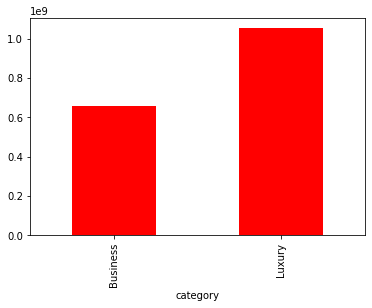

In [1248]:
df_new_bookings_hotels.groupby("category").revenue_realized.sum().plot(kind='bar',color='red')

**Exercise-2 Print average rating per city**

In [1236]:
df_new_bookings_hotels.city.unique()

array(['Delhi', 'Mumbai', 'Hyderabad', 'Bangalore'], dtype=object)

In [1239]:
df_new_bookings_hotels.groupby('city').ratings_given.mean().round(1)

city
Bangalore    3.4
Delhi        3.8
Hyderabad    3.7
Mumbai       3.7
Name: ratings_given, dtype: float64

<AxesSubplot:xlabel='city'>

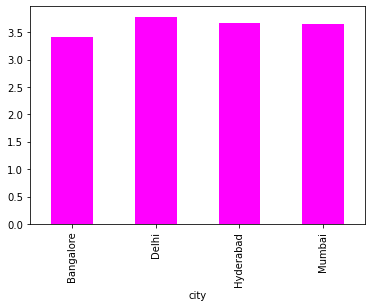

In [1244]:
df_new_bookings_hotels.groupby('city').ratings_given.mean().plot(kind='bar',color='magenta')

**Exercise-3 Print a pie chart of revenue realized per booking platform**

In [1249]:
df_new_bookings_hotels.booking_platform.unique()

array(['others', 'direct online', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [1253]:
import matplotlib.pyplot

In [1255]:
df_v2= df_new_bookings_hotels.groupby('booking_platform').revenue_realized.sum()
df_v2

booking_platform
direct offline     86374933
direct online     168948637
journey           102531334
logtrip           187494028
makeyourtrip      340814104
others            699306762
tripster          123066801
Name: revenue_realized, dtype: int64

<AxesSubplot:ylabel='revenue_realized'>

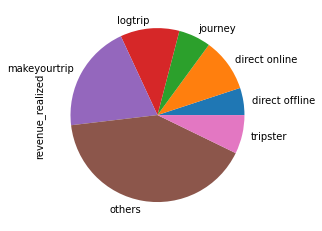

In [1254]:
df_v2= df_new_bookings_hotels.groupby('booking_platform').revenue_realized.sum().plot.pie()
df_v2